In [2]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [13]:
def load_image_paths(root, max_samples=200):
    valid_ext = (".png", ".jpg", ".jpeg", ".tif", ".tiff")
    files = [
        os.path.join(root, f)
        for f in os.listdir(root)
        if f.lower().endswith(valid_ext)
    ]

    if len(files) == 0:
        raise ValueError(f"No valid images found in {root}")

    return random.sample(files, min(len(files), max_samples))


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

backbone = models.resnet50(pretrained=True)
backbone.fc = nn.Identity()  # remove classifier
backbone = backbone.to(device)
backbone.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )
])


c:\Users\adity\Desktop\AI\heavy\heavy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\adity\Desktop\AI\heavy\heavy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\adity/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:02<00:00, 38.5MB/s]


In [6]:
@torch.no_grad()
def extract_features(image_paths):
    feats = []

    for p in image_paths:
        img = Image.open(p).convert("RGB")
        img = transform(img).unsqueeze(0).to(device)
        f = backbone(img)
        feats.append(f.squeeze().cpu().numpy())

    return np.stack(feats)


In [ ]:
N = 200  # number of samples per domain

real_paths = load_image_paths(r"C:\Users\ad\Desktop\AI\heavy\archive\datasets\processed\images_512p", max_samples=N)
syn_paths  = load_image_paths(r"C:\Users\ad\Desktop\AI\heavy\synthetic_isic", max_samples=N)

real_feats = extract_features(real_paths)
syn_feats  = extract_features(syn_paths)

X = np.vstack([real_feats, syn_feats])
labels = np.array([0]*len(real_feats) + [1]*len(syn_feats))


In [8]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

print("Explained variance ratios:")
for i, v in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {v:.4f}")


Explained variance ratios:
PC1: 0.1391
PC2: 0.0963
PC3: 0.0749
PC4: 0.0563
PC5: 0.0561


In [10]:
def plot_pca(pc_x, pc_y, title, save_path):
    plt.figure(figsize=(6, 6))
    plt.scatter(
        X_pca[labels == 0, pc_x],
        X_pca[labels == 0, pc_y],
        alpha=0.6,
        label="Real",
        s=20
    )
    plt.scatter(
        X_pca[labels == 1, pc_x],
        X_pca[labels == 1, pc_y],
        alpha=0.6,
        label="Synthetic",
        s=20
    )
    plt.xlabel(f"PC{pc_x+1}")
    plt.ylabel(f"PC{pc_y+1}")
    plt.title(title)
    plt.legend()
    plt.tight_layout()

    # Save BEFORE show
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()


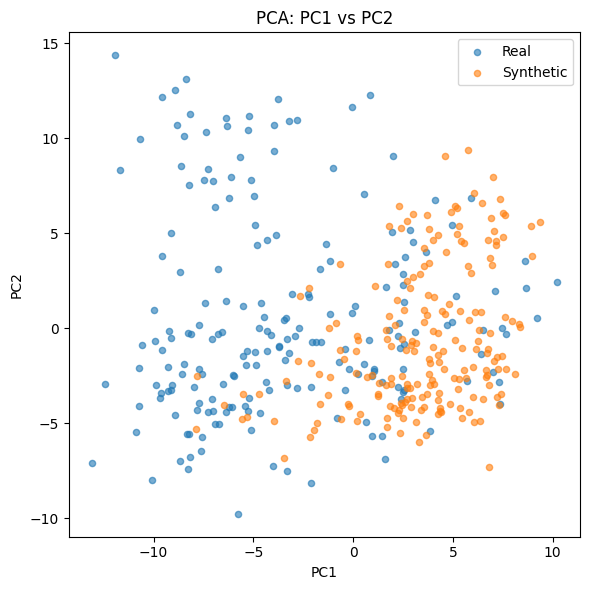

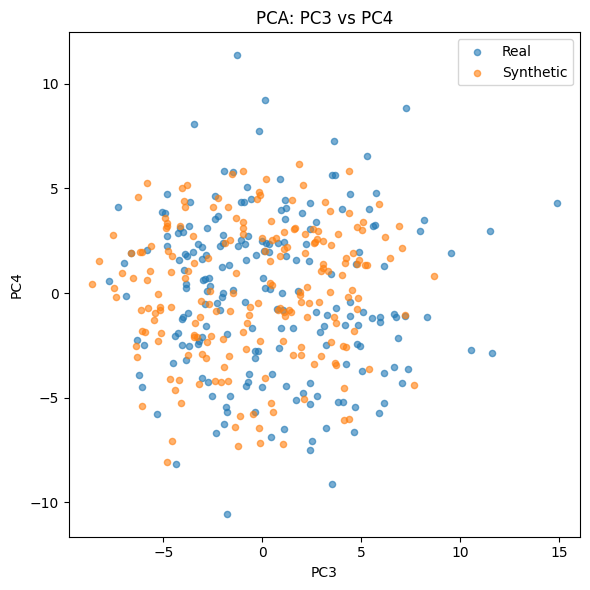

In [11]:
plot_pca(0, 1, "PCA: PC1 vs PC2", "pca_pc1_pc2.png")
plot_pca(2, 3, "PCA: PC3 vs PC4", "pca_pc3_pc4.png")


In [ ]:
N = 200  # number of samples per domain

real_paths = load_image_paths(r"C:\Users\ad\Desktop\AI\heavy\archive\datasets\brain_tumor_dataset\train_A", max_samples=N)
syn_paths  = load_image_paths(r"C:\Users\ad\Desktop\AI\heavy\archive\datasets\brain_tumor_dataset_synt\images", max_samples=N)

real_feats = extract_features(real_paths)
syn_feats  = extract_features(syn_paths)

X = np.vstack([real_feats, syn_feats])
labels = np.array([0]*len(real_feats) + [1]*len(syn_feats))


In [15]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

print("Explained variance ratios:")
for i, v in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {v:.4f}")


Explained variance ratios:
PC1: 0.1224
PC2: 0.0946
PC3: 0.0787
PC4: 0.0559
PC5: 0.0423


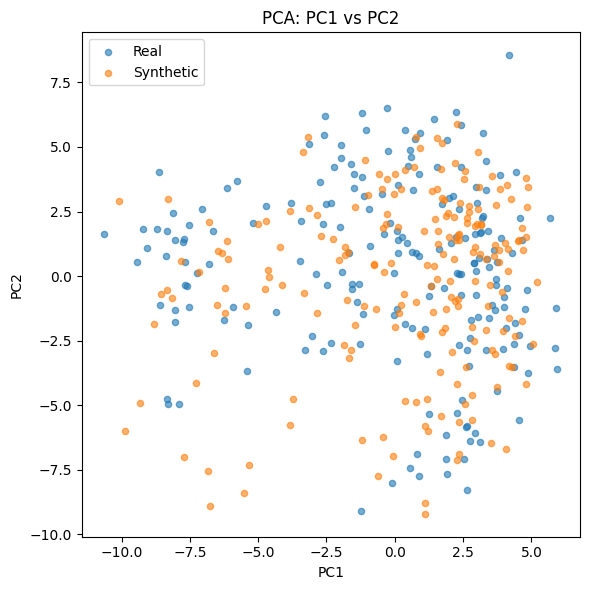

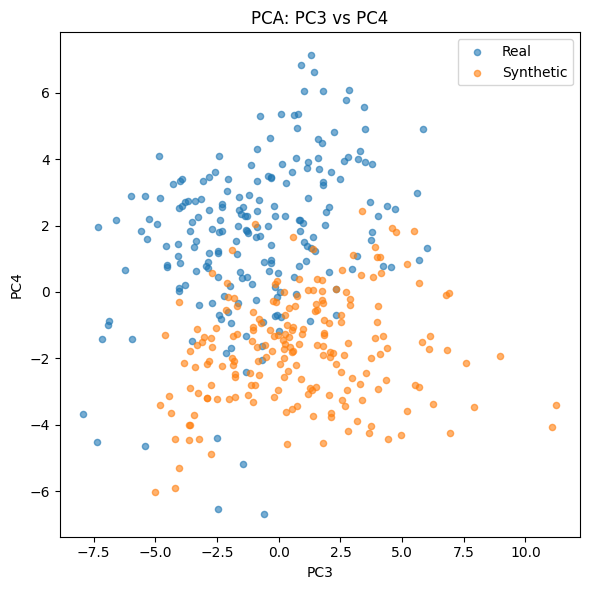

In [16]:
plot_pca(0, 1, "PCA: PC1 vs PC2", "pca_pc1_pc2.png")
plot_pca(2, 3, "PCA: PC3 vs PC4", "pca_pc3_pc4.png")
